In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import sklearn.linear_model as slm

In [202]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price'], na_values=['Zapytajocenę'])

In [203]:
df.head()

,meters,price
0,70.00,699000.0
1,72.00,340000.0
2,30.80,219000.0
3,64.65,569000.0
4,73.30,409000.0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 2 columns):
meters    2745 non-null float64
price     2587 non-null float64
dtypes: float64(2)
memory usage: 43.0 KB


In [205]:
df.price.value_counts(bins=30)

(259733.333, 357600.0]        985
(357600.0, 455466.667]        622
(161866.667, 259733.333]      506
(455466.667, 553333.333]      224
(553333.333, 651200.0]        103
(651200.0, 749066.667]         53
(61063.999, 161866.667]        35
(749066.667, 846933.333]       35
(1042666.667, 1140533.333]      8
(846933.333, 944800.0]          7
(944800.0, 1042666.667]         3
(1238400.0, 1336266.667]        2
(1923466.667, 2021333.333]      2
(2902133.333, 3000000.0]        1
(1434133.333, 1532000.0]        1
(1532000.0, 1629866.667]        0
(2804266.667, 2902133.333]      0
(1336266.667, 1434133.333]      0
(1629866.667, 1727733.333]      0
(1140533.333, 1238400.0]        0
(1727733.333, 1825600.0]        0
(1825600.0, 1923466.667]        0
(2021333.333, 2119200.0]        0
(2119200.0, 2217066.667]        0
(2217066.667, 2314933.333]      0
(2314933.333, 2412800.0]        0
(2412800.0, 2510666.667]        0
(2510666.667, 2608533.333]      0
(2608533.333, 2706400.0]        0
(2706400.0, 28

In [206]:
df.meters.value_counts(bins=30)

(46.35, 78.2]                  1614
(13.543000000000001, 46.35]     712
(78.2, 110.05]                  306
(110.05, 141.9]                  83
(141.9, 173.75]                  22
(173.75, 205.6]                   5
(269.3, 301.15]                   1
(938.15, 970.0]                   1
(747.05, 778.9]                   1
(683.35, 715.2]                   0
(651.5, 683.35]                   0
(874.45, 906.3]                   0
(842.6, 874.45]                   0
(810.75, 842.6]                   0
(778.9, 810.75]                   0
(205.6, 237.45]                   0
(237.45, 269.3]                   0
(715.2, 747.05]                   0
(301.15, 333.0]                   0
(333.0, 364.85]                   0
(364.85, 396.7]                   0
(396.7, 428.55]                   0
(428.55, 460.4]                   0
(906.3, 938.15]                   0
(492.25, 524.1]                   0
(524.1, 555.95]                   0
(555.95, 587.8]                   0
(587.8, 619.65]             

In [207]:
df = df.dropna()

In [208]:
df.describe()

,meters,price
count,2587.000000,2.587000e+03
mean,61.446107,3.619132e+05
std,32.667806,1.544157e+05
min,14.500000,6.400000e+04
25%,46.770000,2.700000e+05
50%,57.150000,3.382100e+05
75%,69.670000,4.000000e+05
max,970.000000,3.000000e+06


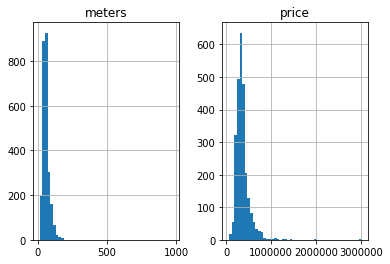

In [209]:
df.hist(bins=50)
plt.show()

In [210]:
def shapiro_test(data):
    test = sps.shapiro(data)
    st, pv = test
    print("{} : Test Shapiro-Wilka. H0: kurtoza = 3 i skosnosc = 0, H1: kurtoza != 3 lub/i skosnosc !=0\n"
          "P-value wynosi:{}".format(data.name, round(pv, 2)))
    if pv > 0.05:
        return "Nie ma podstaw do odrzucenia hipotezy 0"
    if pv < 0.05:
        return "Orzucono hipoteze 0 na rzecz hipotezy 1"

In [211]:
shapiro_test(df.meters)

meters : Test Shapiro-Wilka. H0: kurtoza = 3 i skosnosc = 0, H1: kurtoza != 3 lub/i skosnosc !=0
P-value wynosi:0.0


'Orzucono hipoteze 0 na rzecz hipotezy 1'

In [212]:
def plot_test(data, i=0):
    plt.figure(i)
    m, s = sp.stats.norm.fit(data)
    plt.subplot(131)
    plt.axis([0, 150, 0, 1])
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, 'r-', label=r'$\hat{F}_n(x)$')

    t1 = np.linspace(0, 300, 100)
    t2 = sp.stats.norm.cdf(t1, loc=m, scale=s)
    t3 = sp.stats.norm.pdf(t1, loc=m, scale=s)
    plt.plot(t1, t2, 'b--', label=r'$\mathrm{N}(%.2f, %.2f)$' % (m, s))
    plt.legend(loc='best')

    plt.subplot(132)
    sns.distplot(data, bins=8, color='k')
    plt.plot(t1, t3, 'g--')

    plt.subplot(133)
    sp.stats.probplot(data, dist=sp.stats.norm, plot=plt)
    plt.show()

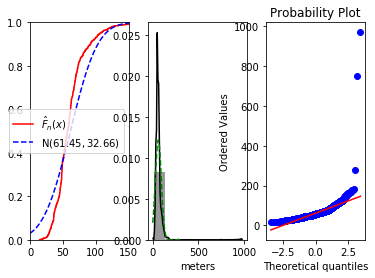

In [213]:
plot_test(df.meters)

Wyraz wolny jest równy: 5.335921120175102
Współczynnik kierunkowy wynosi: [0.00015504]
Współczynnik dopasowania wynosi: 0.5370533600289469


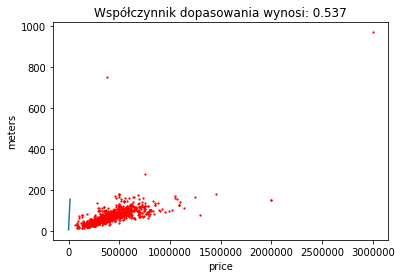

In [232]:
x_axis = np.array([df.price]).reshape(-1, 1)
y_axis = np.array(df.meters.tolist())


regresja = slm.LinearRegression()

regresja.fit(x_axis, y_axis)

regresja = slm.LinearRegression()

regresja.fit(x_axis, y_axis)
print('Wyraz wolny jest równy: %s' % np.round(regresja.intercept_, 30))
print('Współczynnik kierunkowy wynosi: %s' % np.round(regresja.coef_, 30))
print('Współczynnik dopasowania wynosi: %s' % np.round(regresja.score(x_axis, y_axis),30))

P = np.array([0.1 * x + 5.33 for x in np.linspace(1, 1500, 1000)])

plt.figure(2)
plt.scatter(x_axis, y_axis, c='r', s=1.5)
plt.plot(np.linspace(1, 15000, 1000), P)
plt.xlabel('price')
plt.ylabel('meters')
plt.title('Współczynnik dopasowania wynosi: 0.537')
plt.show()